# Kaggle 2018 ML & DS Survey

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Feb 2 00:42:21 2019

@author: Guangya Wan
"""

import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
from plotly.graph_objs import Scatter, Layout
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
#set the backgroung style sheet
sns.set_style("whitegrid")
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("data"))

# Any results you write to the current directory are saved as output.

['Admission_Predict_Ver1.1.csv', 'Admission_Predict.csv', 'freeFormResponses.csv', 'multipleChoiceResponses.csv', 'SurveySchema.csv']


In [9]:
survey_df = pd.read_csv('data/SurveySchema.csv')
freeFormResp_df = pd.read_csv('data/freeFormResponses.csv')
multiChoice_df = pd.read_csv('data/multipleChoiceResponses.csv')

In [10]:
survey_df.head()

,2018 Kaggle Machine Learning and Data Science Survey,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,Q47,Q48,Q49,Q5,Q50,Q6,Q7,Q8,Q9,Time from Start to Finish (seconds)
0,Question:,What is your gender? - Selected Choice,Does your current employer incorporate machine...,Select any activities that make up an importan...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebooks have y...,Which of the following cloud computing service...,What programming languages do you use on a reg...,What specific programming language do you use ...,...,What methods do you prefer for explaining and/...,"Do you consider ML models to be ""black boxes"" ...",What tools and methods do you use to make your...,Which best describes your undergraduate major?...,What barriers prevent you from making your wor...,Select the title most similar to your current ...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Duration (in seconds)
1,# of Respondents:,23860,20670,19518,19199,19117,18971,18864,18828,15223,...,13418,13369,12891,22948,12814,22901,21686,21102,20186,23860
2,Who was excluded? (0 = not excluded; 1 = exclu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,If What is your age (# years)? 0-17 Is Selecte...,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,If What is the highest level of formal educati...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0



### Question With Most and Least Number of Responces

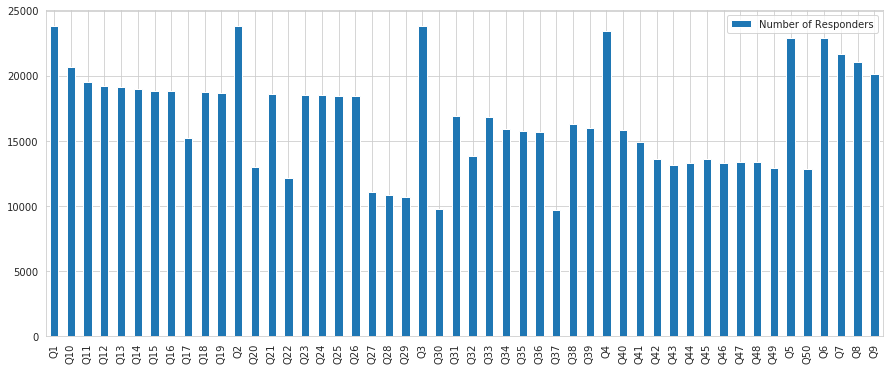

In [11]:
ss = pd.DataFrame(survey_df.loc[1])
ss = ss.drop(['2018 Kaggle Machine Learning and Data Science Survey','Time from Start to Finish (seconds)'],axis=0)
ss[1] = pd.to_numeric(ss[1])
ss = ss.rename(columns={1:'Number of Responders'})
ss.plot(kind='bar',figsize = (15,6))

In [12]:
ss = ss.sort_values('Number of Responders')
print("Questions Which get Least Responce: ")
print(ss.head(3))

print("\nMost Answered Questions: ")
print(ss.tail(3))

Questions Which get Least Responce: 
     Number of Responders
Q37                  9671
Q30                  9746
Q29                 10719

Most Answered Questions: 
    Number of Responders
Q3                 23860
Q2                 23860
Q1                 23860


## Gender Distribution

In [13]:
kp = multiChoice_df['Q1'][1:].value_counts()
kp

Male                       19430
Female                      4010
Prefer not to say            340
Prefer to self-describe       79
Name: Q1, dtype: int64

In [14]:
data = [
go.Bar(
    x = list(kp.index),
    y = list(kp.values),
    marker=dict(color=['rgba(55, 128, 191, 1.0)', 'rgba(219, 64, 82, 0.7)',
               'rgba(50, 171, 96, 0.7)', 'rgb(128,0,128)'])
),]
layout= go.Layout(
    title= 'Gender Distribution',
    yaxis=dict(title='Count', ticklen=5, gridwidth=2),
    xaxis=dict(title='Gender', ticklen=5, gridwidth=2)
)
fig= go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Q1')

## Age Distribution

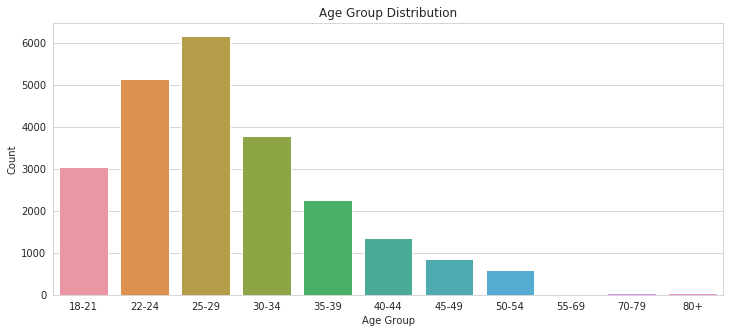

In [15]:
age_df = multiChoice_df['Q2'][1:].dropna()
order= ['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-69', '70-79', '80+']
plt.figure(figsize=(12,5))
sns.countplot(age_df,order=order)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.show()

## Do you consider yourself a Data Scientist?  

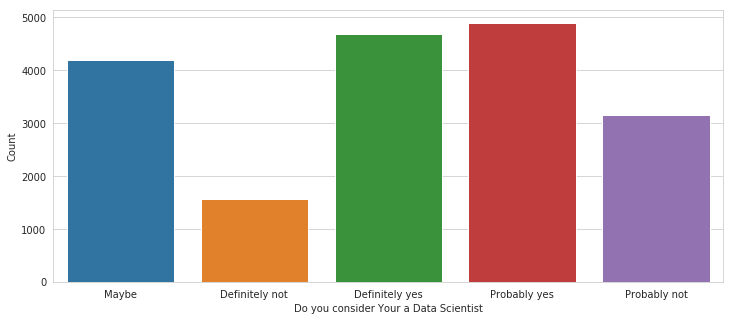

In [16]:
DS_df = multiChoice_df['Q26'][1:].dropna()
plt.figure(figsize=(12,5))
sns.countplot(DS_df)
plt.xlabel('Do you consider Your a Data Scientist')
plt.ylabel('Count')
#plt.title('Age Group Distribution')
plt.show()

## Age Distribution Vs Data Scientists

In [17]:
DP_df = multiChoice_df[['Q2','Q26']][1:].dropna()
#DP_df = DP_df.loc[DP_df['Q3'].isin(country)]
DP_df = DP_df.groupby(['Q26'])['Q2'].value_counts()
xp = ['25-29','22-24','30-34','18-21','35-39','40-44','45-49','50-54','55-59','60-69','80+','70-79']
DP_df

Q26             Q2   
Definitely not  25-29     359
                22-24     318
                30-34     238
                18-21     230
                35-39     137
                40-44     108
                45-49      72
                50-54      52
                55-59      24
                60-69      12
                80+         4
                70-79       3
Definitely yes  25-29    1376
                30-34     944
                22-24     754
                35-39     506
                18-21     338
                40-44     303
                45-49     167
                50-54     132
                55-59      81
                60-69      63
                70-79      14
                80+         6
Maybe           25-29    1050
                22-24     903
                30-34     640
                18-21     452
                35-39     435
                40-44     258
                45-49     190
                50-54     118
                60

In [18]:
trace1 = go.Bar(
    x=xp,
    y=DP_df['Definitely not'],
    name='Definitely not',
    marker = dict(color="rgb(113, 50, 141)")
)
trace2 = go.Bar(
    x=xp,
    y=DP_df['Definitely yes'],
    name='Definitely yes',
    marker = dict(color="rgb(119, 74, 175)")
)

trace3 = go.Bar(
    x=xp,
    y=DP_df['Maybe'],
    name='Maybe',
    marker = dict(color="rgb(120, 100, 202)")
)

trace4 = go.Bar(
    x=xp,
    y=DP_df['Probably not'],
    name='Probably not',
    marker = dict(color="rgb(117, 127, 221)")
)

trace5 = go.Bar(
    x=xp,
    y=DP_df['Probably yes'],
    name='Probably yes',
    marker = dict(color="rgb(191, 221, 229)")
)

data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

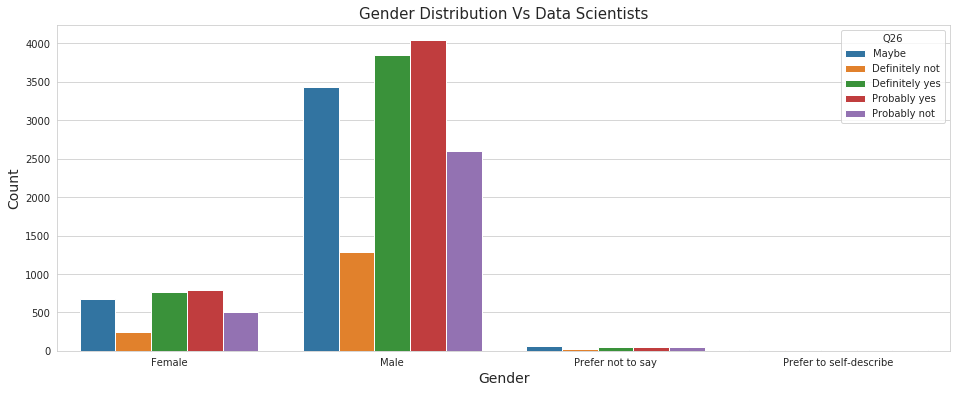

In [19]:
DP_df = multiChoice_df[['Q1','Q26']][1:].dropna()
plt.figure(figsize=(16,6))
p = ['Definitely yes','Probably yes', 'Maybe','Probably not','Definitely not']
sns.countplot(data=DP_df, x='Q1', hue='Q26')
plt.title('Gender Distribution Vs Data Scientists',fontsize=15)
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

## Country Vs Data Scientists

In [20]:
country = ['United States of Americ', 'India', 'China', 'Brazil',                        
                'Canada', 'Japan', 'Russia', 'Spain', 'Australia',                     
                'France', 'Germany']  
DP_df = multiChoice_df[['Q3','Q26']][1:].dropna()
DP_df = DP_df.loc[DP_df['Q3'].isin(country)]
DP_df = DP_df.groupby(['Q26'])['Q3'].value_counts()

In [21]:
trace1 = go.Bar(
    x=country,
    y=DP_df['Definitely not'],
    name='Definitely not',
    marker = dict(color="rgb(113, 50, 141)")
)
trace2 = go.Bar(
    x=country,
    y=DP_df['Definitely yes'],
    name='Definitely yes',
    marker = dict(color="rgb(119, 74, 175)")
)

trace3 = go.Bar(
    x=country,
    y=DP_df['Maybe'],
    name='Maybe',
    marker = dict(color="rgb(120, 100, 202)")
)

trace4 = go.Bar(
    x=country,
    y=DP_df['Probably not'],
    name='Probably not',
    marker = dict(color="rgb(117, 127, 221)")
)

trace5 = go.Bar(
    x=country,
    y=DP_df['Probably yes'],
    name='Probably yes',
    marker = dict(color="rgb(191, 221, 229)")
)

data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [22]:
roles = ['Student','Software Engineer', 'Chief Officer', 'Consultant', 'DBA/Database Engineer', 
         'Data Analyst', 'Data Engineer', 'Data Journalist', 'Data Scientist', 
         'Developer Advocate', 'Manager', 'Marketing Analyst', 'Not employed', 
         'Other', 'Principal Investigator', 'Product/Project Manager', 
         'Research Assistant', 'Research Scientist', 'Salesperson', 'Software Engineer', 
         'Statistician', ]
DP_df = multiChoice_df[['Q6','Q26']][1:].dropna()
DP_df = DP_df.groupby(['Q26'])['Q6'].value_counts()

DP_df

Q26             Q6                     
Definitely not  Student                     378
                Software Engineer           333
                Other                       181
                Data Analyst                105
                Business Analyst             78
                Not employed                 74
                Manager                      70
                Consultant                   63
                Product/Project Manager      57
                Data Engineer                43
                Research Scientist           39
                Research Assistant           35
                Chief Officer                23
                Salesperson                  21
                Data Scientist               17
                DBA/Database Engineer        12
                Developer Advocate           12
                Marketing Analyst             8
                Statistician                  7
                Data Journalist               1


In [23]:
trace1 = go.Bar(
    x=roles,
    y=DP_df['Definitely not'],
    name='Definitely not',
    marker = dict(color="rgb(113, 50, 141)")
)
trace2 = go.Bar(
    x=roles,
    y=DP_df['Definitely yes'],
    name='Definitely yes',
    marker = dict(color="rgb(119, 74, 175)")
)

trace3 = go.Bar(
    x=roles,
    y=DP_df['Maybe'],
    name='Maybe',
    marker = dict(color="rgb(120, 100, 202)")
)

trace4 = go.Bar(
    x=roles,
    y=DP_df['Probably not'],
    name='Probably not',
    marker = dict(color="rgb(117, 127, 221)")
)

trace5 = go.Bar(
    x=roles,
    y=DP_df['Probably yes'],
    name='Probably yes',
    marker = dict(color="rgb(191, 221, 229)")
)

data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

## **Country**

In [24]:
country_df = multiChoice_df['Q3'][1:].value_counts()
country_df.head(10)

United States of America                                4716
India                                                   4417
China                                                   1644
Other                                                   1036
Russia                                                   879
Brazil                                                   736
Germany                                                  734
United Kingdom of Great Britain and Northern Ireland     702
France                                                   604
Canada                                                   604
Name: Q3, dtype: int64

In [25]:
data = [dict(
        type='choropleth',
        locations = list(country_df.index),
        locationmode='country names',
        z=(country_df.values),
        text=list(country_df.index),
        colorscale='Portland',
        reversescale=True,
)]
layout = dict(
    title = 'A Map About Population of Data Scientists in Each Country',
    geo = dict(showframe=False, showcoastlines=True, projection=dict(type='Mercator'))
)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='world-map')

In [26]:
country = ['Australia', 'Brazil', 'Canada','China', 'France', 'Germany',
                'India','Japan', 'Russia', 'Spain', 'United States of America']
DP_df = multiChoice_df[['Q3','Q1']][1:].dropna()
DP_df = DP_df.loc[DP_df['Q3'].isin(country)]
DP_df = DP_df.groupby(['Q1','Q3'])['Q1'].count()

In [27]:
trace1 = go.Bar(
    x=country,
    y=DP_df['Male'],
    name='Male'
)
trace2 = go.Bar(
    x=country,
    y=DP_df['Female'],
    name='Female'
)

trace3 = go.Bar(
    x=country,
    y=DP_df['Prefer not to say'],
    name='Prefer not to say'
)

trace4 = go.Bar(
    x=country,
    y=DP_df['Prefer to self-describe'],
    name='Prefer to self-describe'
)

data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

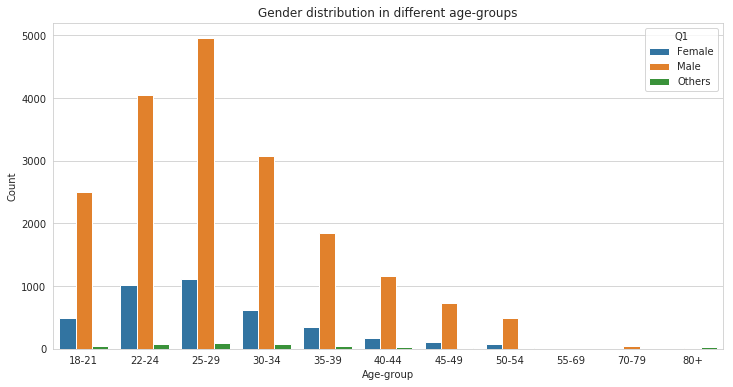

In [28]:
df = multiChoice_df[['Q1', 'Q2']][1:].dropna()
df['Q1'] = df['Q1'].replace(['Prefer not to say', 'Prefer to self-describe'], 'Others')

# Select only those indices where the top 10 countries are there
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Q2', hue='Q1', hue_order=['Female','Male', 'Others'], order=order)
plt.xlabel('Age-group')
plt.ylabel('Count')
plt.title('Gender distribution in different age-groups')
plt.show()
